In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# These are our preliminary data visualizations, we plan on adding more for our results section and manipulating the data more for our results section.

In [2]:
# load data from parameter sweep
data_set = '30_cars_3_lanes.csv'
df = pd.read_csv(f'data/{data_set}')

In [3]:
# average the values across each of the identical 3 runs:
data = df.groupby(['reckless', 'cautious', 'normal']).mean().reset_index()
data.head(10)

,reckless,cautious,normal,num_epochs,num_cars,avg_diff_speed_reckless,avg_diff_speed_cautious,avg_diff_speed_normal,avg_lane_changes,avg_speed
0,0.0,0.0,1.0,NaN,30.0,0.0,0.000000,139.384001,0.952048,0.735051
1,0.0,0.1,0.9,NaN,30.0,0.0,86.967612,118.728169,0.956549,0.755517
2,0.0,0.2,0.8,NaN,30.0,0.0,136.739317,151.312436,0.937422,0.689767
3,0.0,0.3,0.7,NaN,30.0,0.0,157.305932,154.451911,0.958076,0.662487
4,0.0,0.4,0.6,NaN,30.0,0.0,169.507729,154.035333,0.963315,0.664197
5,0.0,0.5,0.5,NaN,30.0,0.0,180.071962,182.559068,0.947043,0.608886
6,0.0,0.6,0.4,NaN,30.0,0.0,184.412003,190.180789,0.927904,0.611765
7,0.0,0.7,0.3,NaN,30.0,0.0,192.938136,180.265624,0.915165,0.589249
8,0.0,0.8,0.2,NaN,30.0,0.0,204.345058,208.705707,0.954525,0.559769
9,0.0,0.9,0.1,NaN,30.0,0.0,204.577398,193.271706,0.943033,0.556314


Text(0, 0.5, 'Total Speed Difference over an entire simulation run')

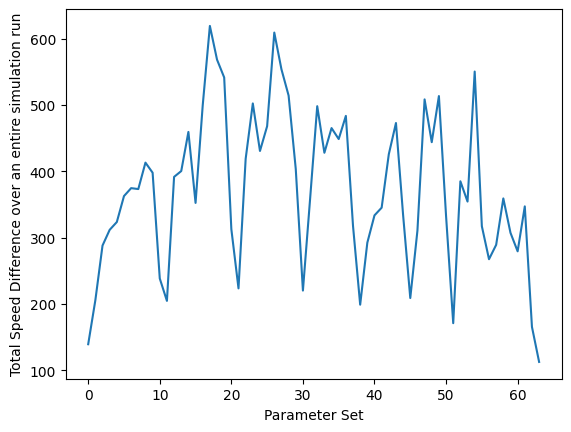

In [4]:
# make a column for sum(avg(|car_speed - desired speed|) per timestep)
data['total_speed_diff'] = data['avg_diff_speed_cautious'] + data['avg_diff_speed_reckless'] + data['avg_diff_speed_normal']

# plot the total speed difference
plt.plot(data['total_speed_diff'])
plt.xlabel("Parameter Set")
plt.ylabel("Total Speed Difference over an entire simulation run")

*We are interested in the relative minima, to see what distrubution of drivers is most ideal for maintaining a desired speed*

In [6]:
# get the total difference for each parameter set in the form [(reckless_p, cautious_p, normal_p), total_speed_diff]
speed_diffs = data.drop(columns=['avg_diff_speed_cautious', 'avg_diff_speed_reckless', 'avg_diff_speed_normal', 'num_epochs', 'num_cars', 'avg_speed', 'avg_lane_changes'])
speed_diffs = speed_diffs.to_numpy()
# round the whole list to 2 decimal places
speed_diffs = np.round(speed_diffs, 2)
speed_diffs = [((r, c, n), speed_diff) for r, c, n, speed_diff in speed_diffs]
# sort by total speed difference in ascending order
speed_diffs.sort(key=lambda x: x[1])

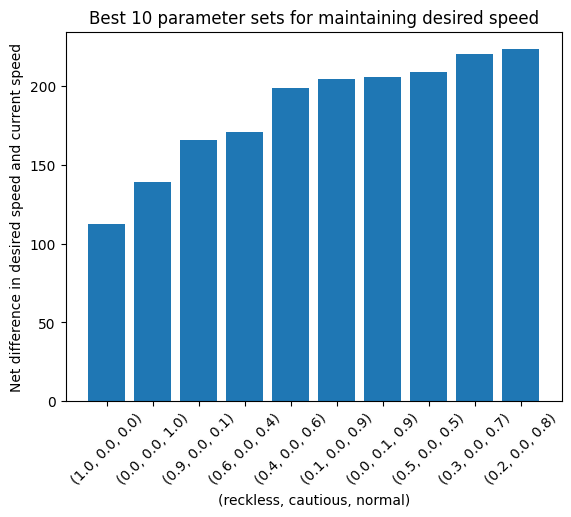

In [7]:
# get the 10 parameters with the lowest total speed difference
relative_minima = speed_diffs[:10]
plt.figure()
x_ticks = [f"({r}, {c}, {n})" for (r, c, n), _ in relative_minima]
y_values = [speed_diff for _, speed_diff in relative_minima]

plt.bar(x_ticks, y_values)
plt.xlabel("(reckless, cautious, normal)")
plt.ylabel("Net difference in desired speed and current speed")
plt.title("Best 10 parameter sets for maintaining desired speed")
plt.xticks(rotation=45)
plt.show()

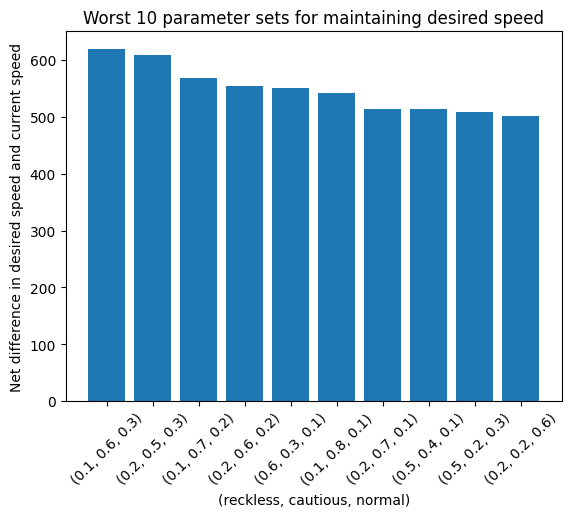

In [8]:
# get the 10 parameters with the highest total speed difference
relative_maxima = speed_diffs[::-1][:10]
plt.figure()
x_ticks = [f"({r}, {c}, {n})" for (r, c, n), _ in relative_maxima]
y_values = [speed_diff for _, speed_diff in relative_maxima]

plt.bar(x_ticks, y_values)
plt.xlabel("(reckless, cautious, normal)")
plt.ylabel("Net difference in desired speed and current speed")
plt.title("Worst 10 parameter sets for maintaining desired speed")
plt.xticks(rotation=45)
plt.show()